In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
df= pd.read_csv(r'true_car_listings.csv')

In [3]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [4]:
df.shape

(852122, 8)

In [5]:
df.isnull().sum().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [7]:
df.corr()

,Price,Year,Mileage
Price,1.000000,0.401250,-0.421237
Year,0.401250,1.000000,-0.764849
Mileage,-0.421237,-0.764849,1.000000


<AxesSubplot:>

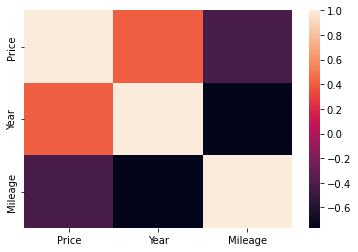

In [8]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Year'>

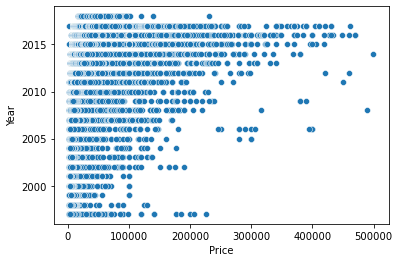

In [9]:
sns.scatterplot(df.Price,df.Year)


<AxesSubplot:xlabel='Price', ylabel='Mileage'>

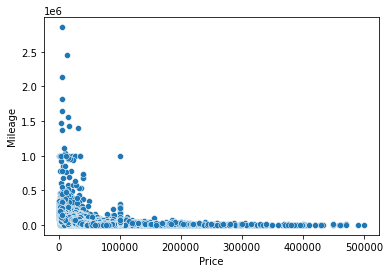

In [10]:
sns.scatterplot(df.Price,df.Mileage)

<AxesSubplot:>

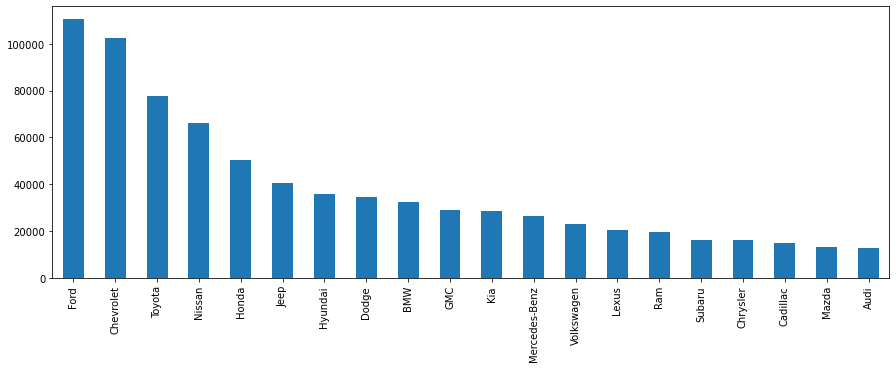

In [11]:
df.Make.value_counts()[:20].plot.bar(figsize=(15,5))

In [12]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [13]:
df.Model.value_counts()

Silverado          24932
Grand              17321
Accord             14502
F-1504WD           14177
Altima2.5          11288
                   ...  
EdgeLTD                1
ExpeditionEddie        1
EscortSE               1
Ranger                 1
V60Polestar            1
Name: Model, Length: 2736, dtype: int64

In [14]:
df.Make.value_counts()

Ford             110432
Chevrolet        102268
Toyota            77786
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23249
Lexus             20641
Ram               19808
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab            

In [15]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [16]:
df[df.Price<3000]

,Price,Year,Mileage,City,State,Vin,Make,Model
1689,2995,2002,120001,Kahului,HI,19UUA56882A057201,Acura,TLType-S
1839,1985,2002,131239,Des Plaines,IL,19UUA56612A047740,Acura,TLAutomatic
1987,1950,2002,139802,Levittown,PA,19UUA56712A059721,Acura,TLAutomatic
2293,2995,2004,164694,Springfield,NJ,19UUA66294A030139,Acura,TLAutomatic
2379,2950,2003,155023,Bloomingdale,NJ,19UUA566X3A038987,Acura,TLAutomatic
...,...,...,...,...,...,...,...,...
851197,1500,2002,181020,Newark,NJ,YV1RS61RX22195947,Volvo,S602.4
851287,2595,2002,180707,Bethlehem,PA,YV1RH58D322191256,Volvo,S602.4T
851296,2694,2004,259757,Nicholasville,KY,YV1SZ59H441139059,Volvo,V70XC70
851311,2850,1998,200158,North Hollywood,CA,YV1LS5574W1532522,Volvo,S704dr


In [17]:
X=df[['State','Year','Make','Model','Vin']]

In [18]:
ohe=OneHotEncoder()

In [19]:
x=ohe.fit_transform(X)

In [20]:
x

<852122x854950 sparse matrix of type '<class 'numpy.float64'>'
	with 4260610 stored elements in Compressed Sparse Row format>

In [21]:
y=df['Price']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
x_train

<596485x854950 sparse matrix of type '<class 'numpy.float64'>'
	with 2982425 stored elements in Compressed Sparse Row format>

In [24]:
y_train

665511    17900
415654    21999
180614    45500
515543    29491
500119    23695
          ...  
185266    36999
134494    23800
520220    47597
540188    19744
124667    13295
Name: Price, Length: 596485, dtype: int64

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(x_test)

In [28]:
r2_score(y_test,y_pred)

0.8459259237366453

In [29]:
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 0.85


In [30]:
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

RMSE: 5367.409138326442
